In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from src.data.datasets import ModelParamsDataset
from src.model.models import MLP
import src.model.train as trainer
from src.config import config as cfg

from tqdm.notebook import tqdm

from dotenv import dotenv_values
from pathlib import Path
import random
import string

## Classifiers

Config loaded:
 {'name': 'classifier_medium', 'dataset': {'name': 'zoo_medium_medium.csv', 'splits': [0.7, 0.2, 0.1], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 50, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 151, 'hidden_dims': [400, 200], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}
C:\Projects\Python\master-thesis\data\zoo_medium_medium.csv
Train sample: 56000
Validation sample: 16000
Test sample: 8000


100%|██████████| 50/50 [05:56<00:00,  7.14s/it]


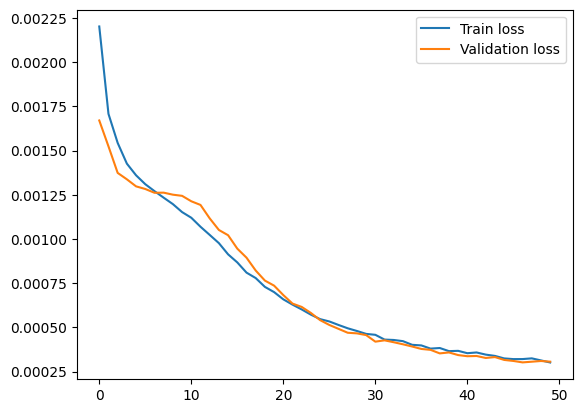

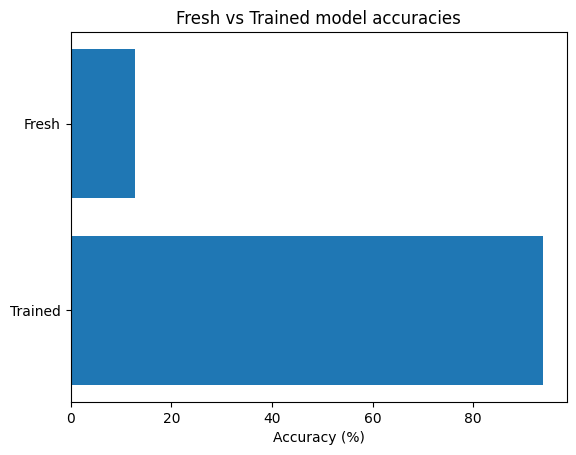

In [2]:
config_name = "classifier_medium.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])

name = ''.join(random.choices(string.ascii_lowercase, k=7))
name = config["name"]
# Hyperparameters
hyperparameters = config["hyperparameters"]
epochs = hyperparameters["epochs"]
learning_rate = hyperparameters["learning_rate"]
seed = hyperparameters["seed"]

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]
dataset_splits = dataset_config["splits"]
batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
print(dataset_path)
# Create a dataset
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)

torch.manual_seed(dataset_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Split into train, validation and test sets
dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test)

print("Train sample:", len(dataset_train))
print("Validation sample:", len(dataset_valid))
print("Test sample:", len(dataset_test))


torch.manual_seed(seed)

# Init
model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
model.to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses, valid_losses = trainer.train_mlp(model, epochs, learning_rate, criterion, optimizer, dataloader_train, dataloader_valid)

plt.plot(train_losses, label="Train loss")
plt.plot(valid_losses, label="Validation loss")
plt.legend()
plt.show()

# Check improvement compared to a fresh model
model_fresh = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
accuracy_fresh = trainer.get_accuracy(model_fresh, dataloader_test)
accuracy_trained = trainer.get_accuracy(model, dataloader_test)

plt.title("Fresh vs Trained model accuracies")
plt.barh(["Trained", "Fresh"], [accuracy_trained, accuracy_fresh])
plt.xlabel("Accuracy (%)")
plt.show()

model_path = models_dir / f"{name}.pth"
torch.save(model.state_dict(), model_path)


Config loaded:
 {'name': 'classifier_small', 'dataset': {'name': 'zoo_small.csv', 'splits': [0.5, 0.25, 0.25], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 20, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 33, 'hidden_dims': [50, 20], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}
C:\Projects\Python\master-thesis\data\zoo_small.csv
Train sample: 40000
Validation sample: 20000
Test sample: 20000


100%|██████████| 20/20 [01:47<00:00,  5.37s/it]


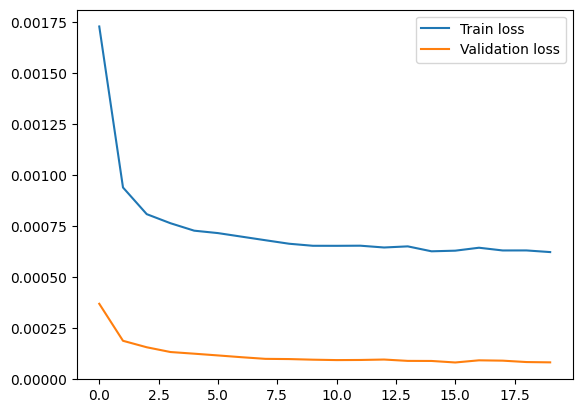

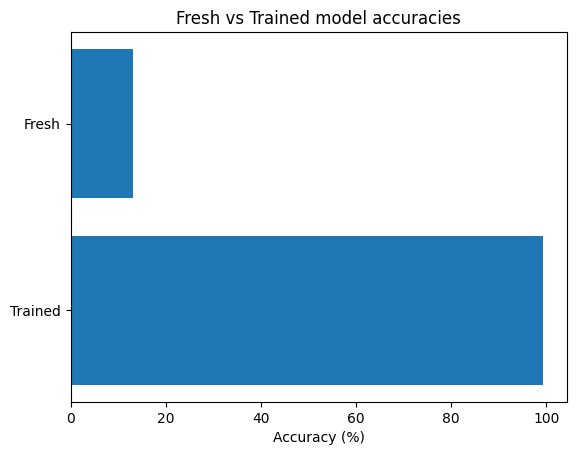

99.30500030517578


In [11]:
config_name = "classifier_small.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])

name = ''.join(random.choices(string.ascii_lowercase, k=7))
name = config["name"]
# Hyperparameters
hyperparameters = config["hyperparameters"]
epochs = hyperparameters["epochs"]
learning_rate = hyperparameters["learning_rate"]
seed = hyperparameters["seed"]

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]
dataset_splits = dataset_config["splits"]
batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
print(dataset_path)
# Create a dataset
dataset = ModelParamsDataset(dataset_path, 45)

torch.manual_seed(dataset_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Split into train, validation and test sets
dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test)

print("Train sample:", len(dataset_train))
print("Validation sample:", len(dataset_valid))
print("Test sample:", len(dataset_test))


torch.manual_seed(seed)

# Init
model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
model.to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses, valid_losses = trainer.train_mlp(model, epochs, learning_rate, criterion, optimizer, dataloader_train, dataloader_valid)

plt.plot(train_losses, label="Train loss")
plt.plot(valid_losses, label="Validation loss")
plt.legend()
plt.show()

# Check improvement compared to a fresh model
model_fresh = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
accuracy_fresh = trainer.get_accuracy(model_fresh, dataloader_test)
accuracy_trained = trainer.get_accuracy(model, dataloader_test)

plt.title("Fresh vs Trained model accuracies")
plt.barh(["Trained", "Fresh"], [accuracy_trained, accuracy_fresh])
plt.xlabel("Accuracy (%)")
plt.show()
print(accuracy_trained)

model_path = models_dir / f"{name}.pth"
torch.save(model.state_dict(), model_path)

## Training set size experiments

Config loaded:
 {'name': 'classifier_small', 'dataset': {'name': 'zoo_small.csv', 'splits': [0.5, 0.25, 0.25], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 20, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 33, 'hidden_dims': [50, 20], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}
C:\Projects\Python\master-thesis\data\zoo_small.csv
Train sample: 80
Validation sample: 80
Test sample: 79840


100%|██████████| 100/100 [00:01<00:00, 58.30it/s]


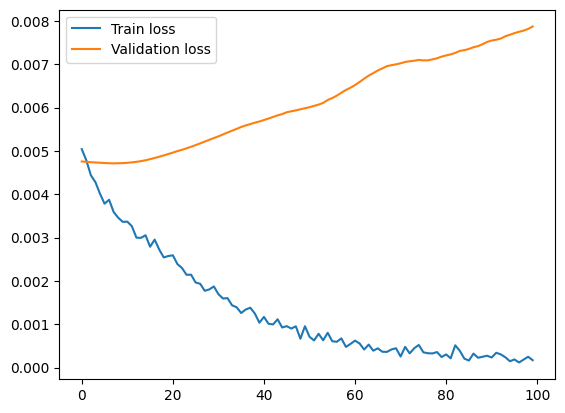

Train sample: 800
Validation sample: 800
Test sample: 78400


100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


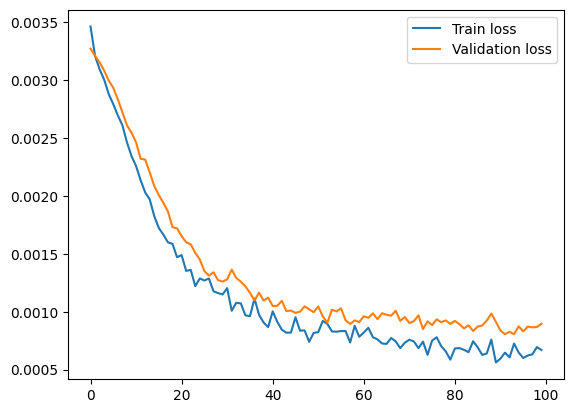

Train sample: 1600
Validation sample: 1600
Test sample: 76800


100%|██████████| 100/100 [00:29<00:00,  3.36it/s]


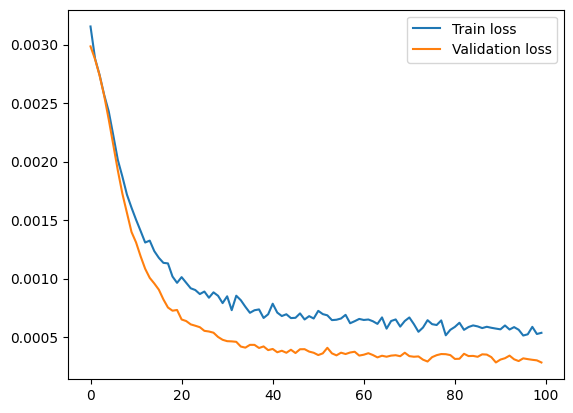

Train sample: 4000
Validation sample: 4000
Test sample: 72000


100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


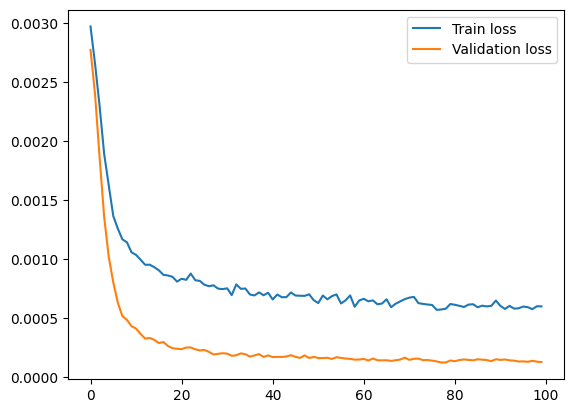

Train sample: 8000
Validation sample: 8000
Test sample: 64000


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


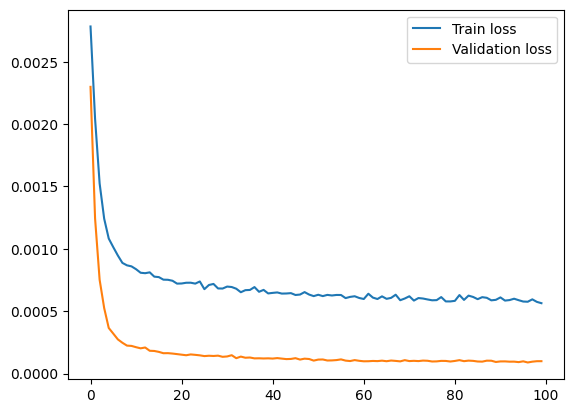

Train sample: 16000
Validation sample: 16000
Test sample: 48000


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


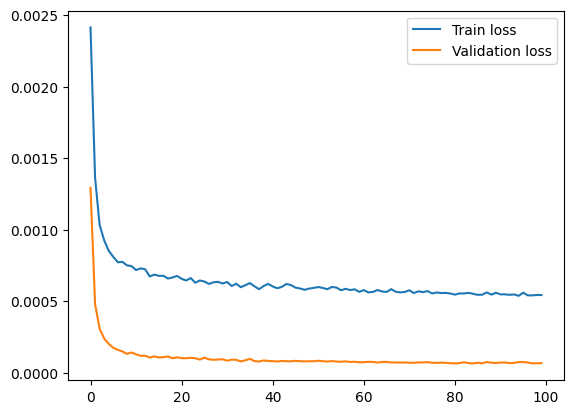

Train sample: 40000
Validation sample: 24000
Test sample: 16000


100%|██████████| 100/100 [09:54<00:00,  5.95s/it]


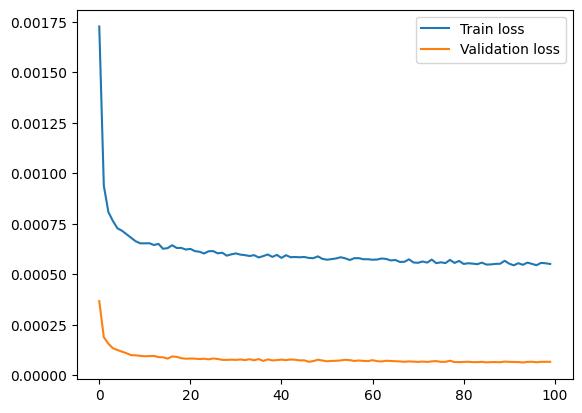

Train sample: 56000
Validation sample: 16000
Test sample: 8000


100%|██████████| 100/100 [11:16<00:00,  6.76s/it]


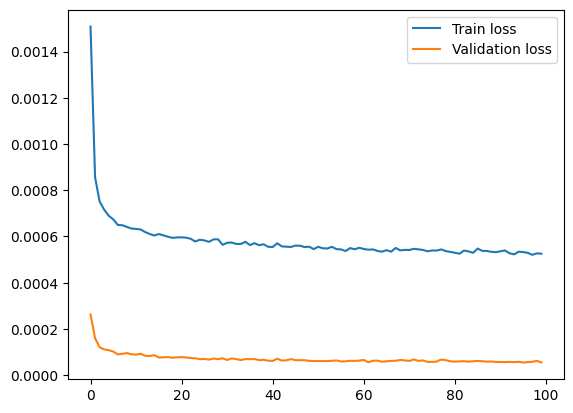

Train sample: 64000
Validation sample: 8000
Test sample: 8000


100%|██████████| 100/100 [11:30<00:00,  6.91s/it]


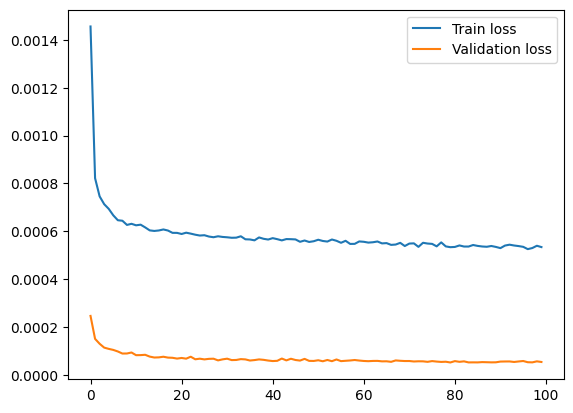

Train sample: 72000
Validation sample: 4000
Test sample: 4000


100%|██████████| 100/100 [12:08<00:00,  7.29s/it]


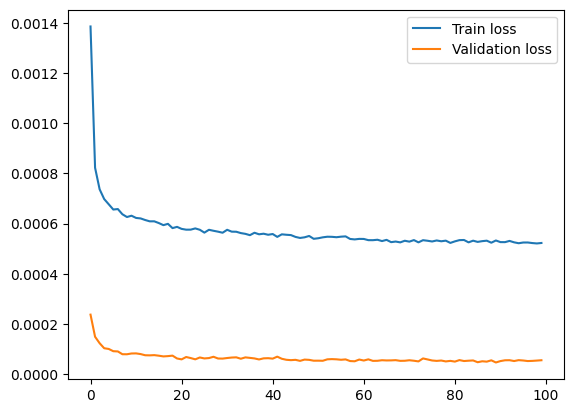

In [5]:
config_name = "classifier_small.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
datasets_dir = Path(default_dirs["datasets_dir"])
models_dir = Path(default_dirs["models_dir"]) / "classifiers" / "mlp" / "small"

# Hyperparameters
hyperparameters = config["hyperparameters"]
epochs = hyperparameters["epochs"]

epochs = 100

learning_rate = hyperparameters["learning_rate"]
seed = hyperparameters["seed"]

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]
dataset_splits = dataset_config["splits"]

batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
print(dataset_path)
# Create a dataset
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
accuracies_small = dict()

for train_size in [[0.001, 0.001, 0.998], [0.01, 0.01, 0.98], [0.02, 0.02, 0.96], [0.05, 0.05, 0.9], [0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.8, 0.1, 0.1], [0.9, 0.05, 0.05]]:
    torch.manual_seed(dataset_seed)

    dataset_splits = train_size

    # Split into train, validation and test sets
    dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
    dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
    dataloader_test = torch.utils.data.DataLoader(dataset_test)

    print("Train sample:", len(dataset_train))
    print("Validation sample:", len(dataset_valid))
    print("Test sample:", len(dataset_test))

    torch.manual_seed(seed)

    # Init
    model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, valid_losses = trainer.train_mlp(model, epochs, learning_rate, criterion, optimizer, dataloader_train, dataloader_valid)

    plt.plot(train_losses, label="Train loss")
    plt.plot(valid_losses, label="Validation loss")
    plt.legend()
    plt.show()

    torch.save(model.state_dict(), models_dir / f"mlp_{train_size[0]}.pth")
    accuracy = trainer.get_accuracy(model, dataloader_test)
    accuracies_small[train_size[0]] = accuracy


Config loaded:
 {'name': 'classifier', 'dataset': {'name': 'zoo_medium.csv', 'splits': [0.7, 0.2, 0.1], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 50, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 151, 'hidden_dims': [400, 200], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}
C:\Projects\Python\master-thesis\data\zoo_medium.csv
Train sample: 80
Validation sample: 80
Test sample: 79840


100%|██████████| 100/100 [00:01<00:00, 53.24it/s]


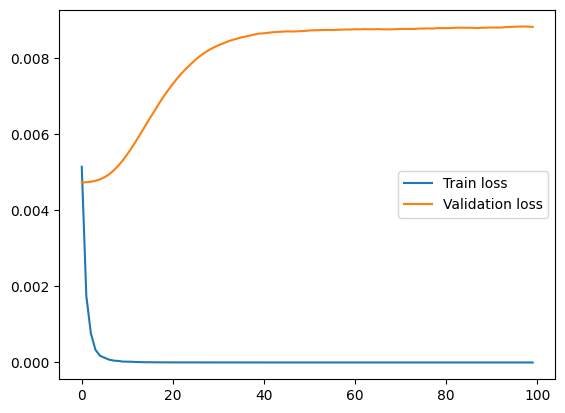

Train sample: 800
Validation sample: 800
Test sample: 78400


100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


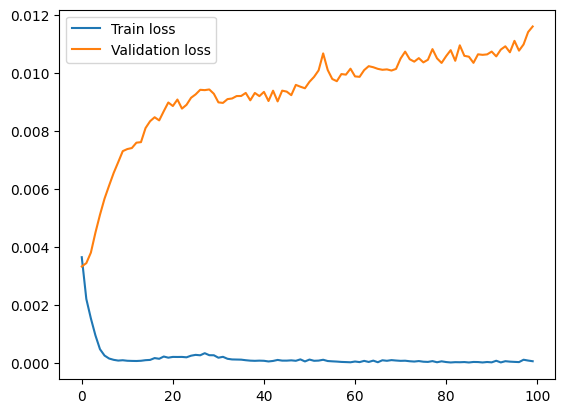

Train sample: 1600
Validation sample: 1600
Test sample: 76800


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


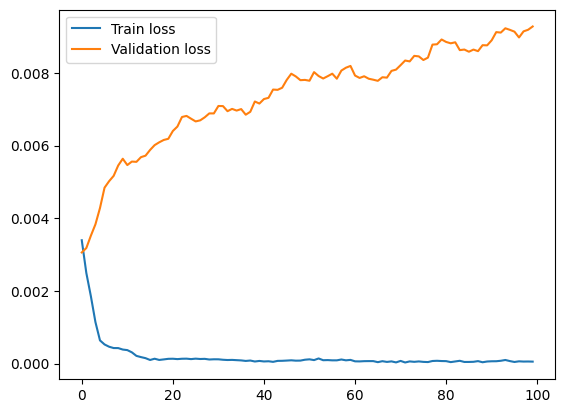

Train sample: 4000
Validation sample: 4000
Test sample: 72000


100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


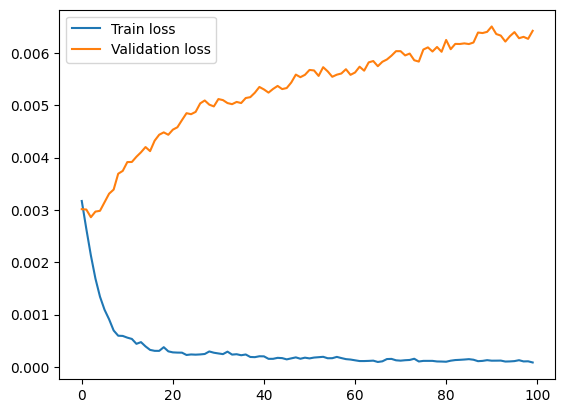

Train sample: 8000
Validation sample: 8000
Test sample: 64000


100%|██████████| 100/100 [02:26<00:00,  1.46s/it]


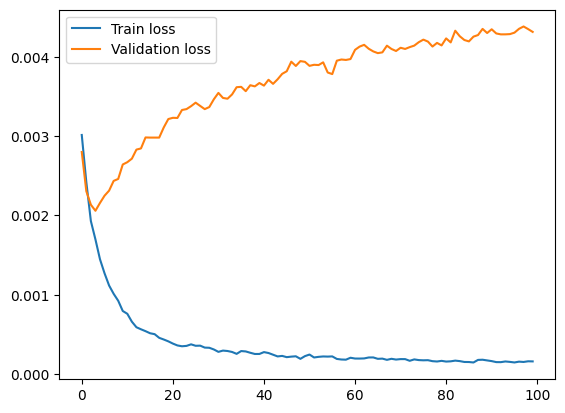

Train sample: 16000
Validation sample: 16000
Test sample: 48000


100%|██████████| 100/100 [04:51<00:00,  2.91s/it]


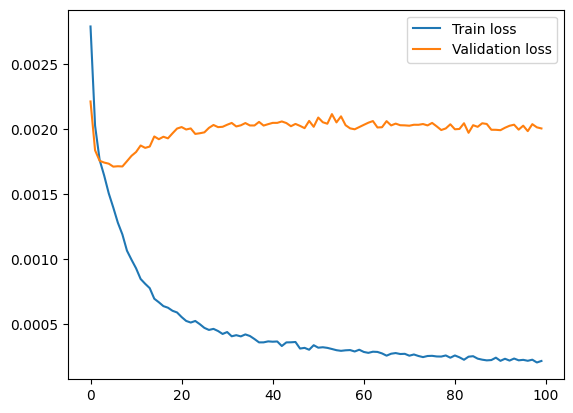

Train sample: 40000
Validation sample: 24000
Test sample: 16000


100%|██████████| 100/100 [09:57<00:00,  5.97s/it]


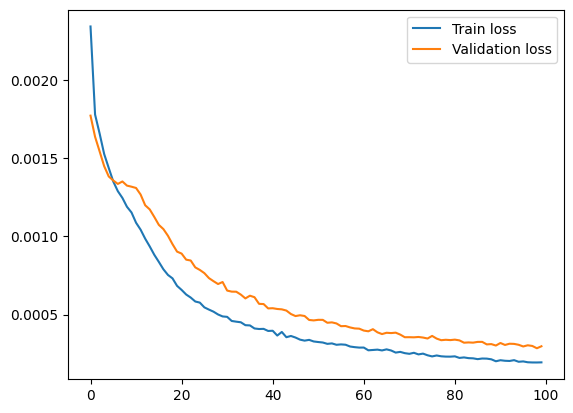

Train sample: 56000
Validation sample: 16000
Test sample: 8000


100%|██████████| 100/100 [11:30<00:00,  6.90s/it]


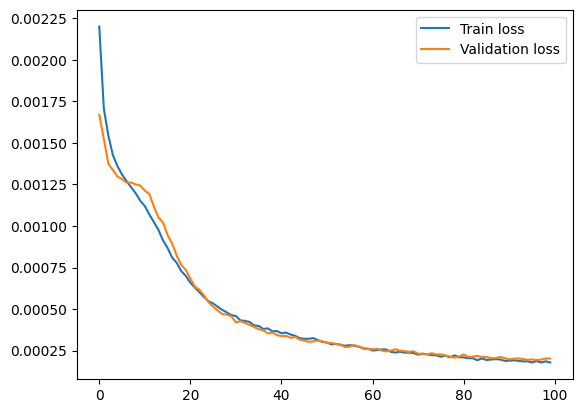

Train sample: 64000
Validation sample: 8000
Test sample: 8000


100%|██████████| 100/100 [11:49<00:00,  7.10s/it]


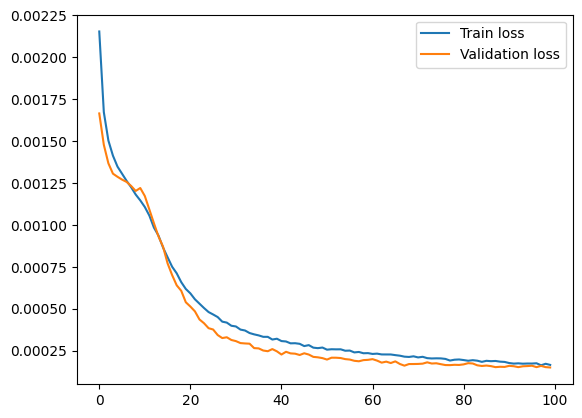

Train sample: 72000
Validation sample: 4000
Test sample: 4000


100%|██████████| 100/100 [13:23<00:00,  8.03s/it]


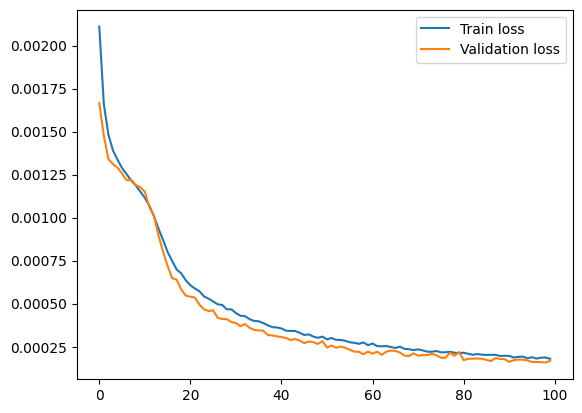

In [6]:
config_name = "classifier_medium.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])
models_dir = Path(default_dirs["models_dir"]) / "classifiers" / "mlp" / "medium"

# Hyperparameters
hyperparameters = config["hyperparameters"]
epochs = hyperparameters["epochs"]

epochs = 100

learning_rate = hyperparameters["learning_rate"]
seed = hyperparameters["seed"]

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]
dataset_splits = dataset_config["splits"]

batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
print(dataset_path)
# Create a dataset
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
accuracies_medium = dict()

for train_size in [[0.001, 0.001, 0.998], [0.01, 0.01, 0.98], [0.02, 0.02, 0.96], [0.05, 0.05, 0.9], [0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.8, 0.1, 0.1], [0.9, 0.05, 0.05]]:
    torch.manual_seed(dataset_seed)

    dataset_splits = train_size

    # Split into train, validation and test sets
    dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
    dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
    dataloader_test = torch.utils.data.DataLoader(dataset_test)

    print("Train sample:", len(dataset_train))
    print("Validation sample:", len(dataset_valid))
    print("Test sample:", len(dataset_test))

    torch.manual_seed(seed)

    # Init
    model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, valid_losses = trainer.train_mlp(model, epochs, learning_rate, criterion, optimizer, dataloader_train, dataloader_valid)

    plt.plot(train_losses, label="Train loss")
    plt.plot(valid_losses, label="Validation loss")
    plt.legend()
    plt.show()
    
    torch.save(model.state_dict(), models_dir / f"mlp_{train_size[0]}.pth")
    accuracy = trainer.get_accuracy(model, dataloader_test)
    accuracies_medium[train_size[0]] = accuracy


Config loaded:
 {'name': 'classifier', 'dataset': {'name': 'zoo_big.csv', 'splits': [0.7, 0.2, 0.1], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 50, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 261, 'hidden_dims': [400, 200], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}
C:\Projects\Python\master-thesis\data\zoo_big.csv
Train sample: 80
Validation sample: 80
Test sample: 79840


100%|██████████| 100/100 [00:02<00:00, 45.40it/s]


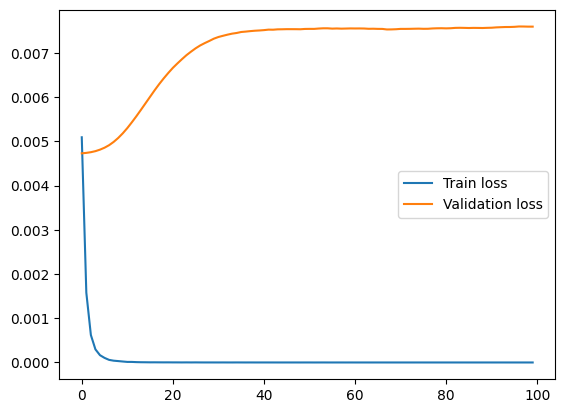

Train sample: 800
Validation sample: 800
Test sample: 78400


100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


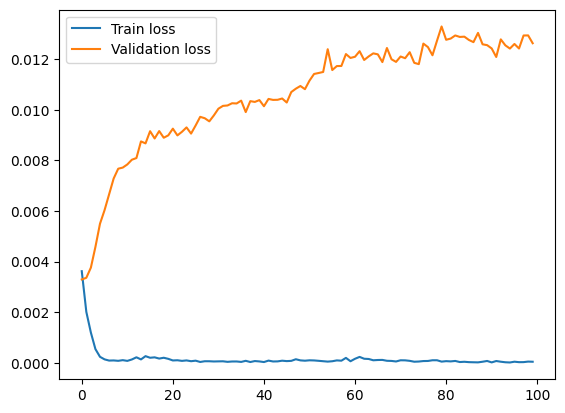

Train sample: 1600
Validation sample: 1600
Test sample: 76800


100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


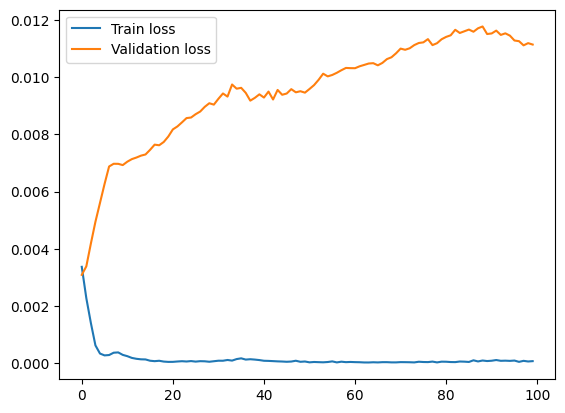

Train sample: 4000
Validation sample: 4000
Test sample: 72000


100%|██████████| 100/100 [01:19<00:00,  1.25it/s]


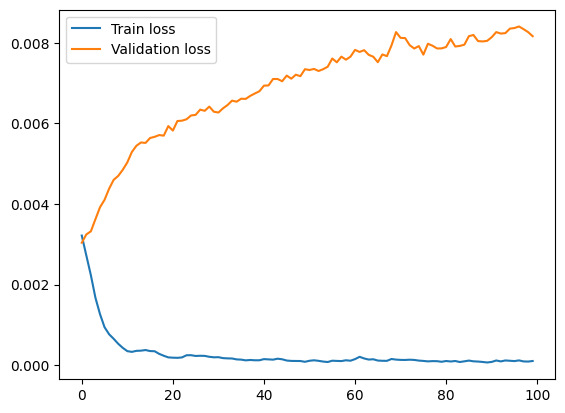

Train sample: 8000
Validation sample: 8000
Test sample: 64000


100%|██████████| 100/100 [02:35<00:00,  1.56s/it]


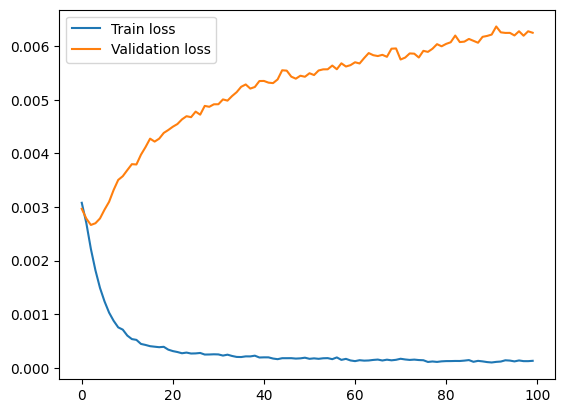

Train sample: 16000
Validation sample: 16000
Test sample: 48000


100%|██████████| 100/100 [05:10<00:00,  3.11s/it]


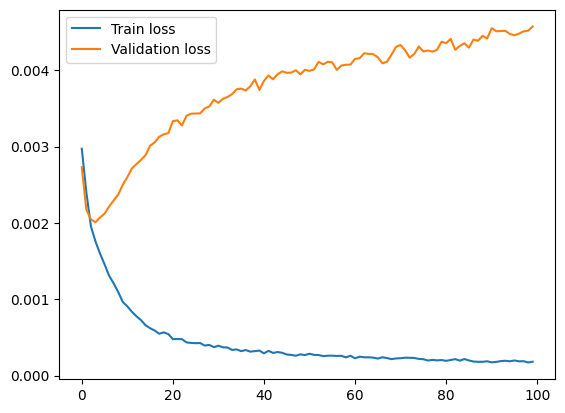

Train sample: 40000
Validation sample: 24000
Test sample: 16000


100%|██████████| 100/100 [10:40<00:00,  6.40s/it]


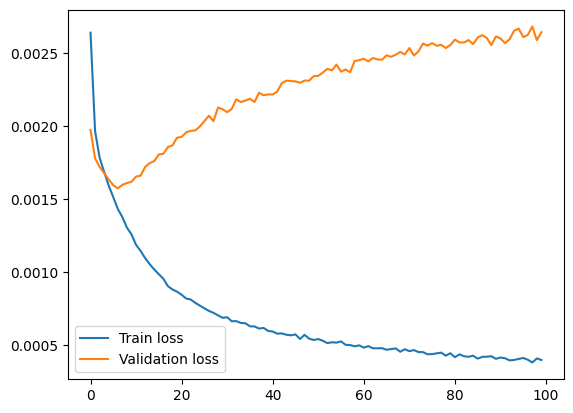

Train sample: 56000
Validation sample: 16000
Test sample: 8000


100%|██████████| 100/100 [14:04<00:00,  8.44s/it]


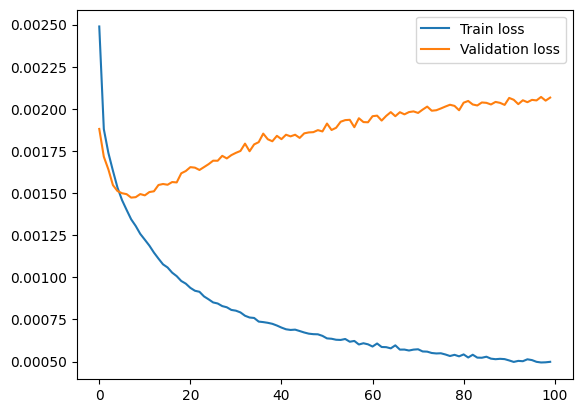

Train sample: 64000
Validation sample: 8000
Test sample: 8000


100%|██████████| 100/100 [12:33<00:00,  7.54s/it]


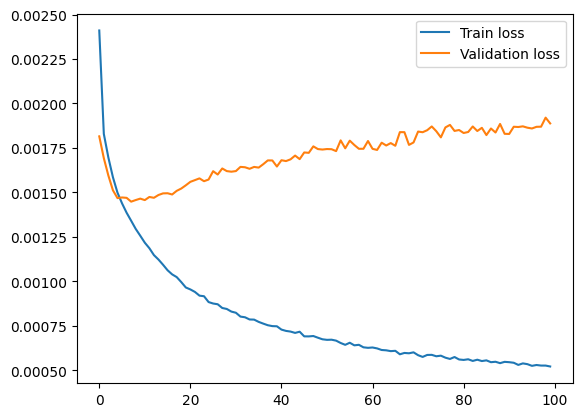

Train sample: 72000
Validation sample: 4000
Test sample: 4000


100%|██████████| 100/100 [13:04<00:00,  7.85s/it]


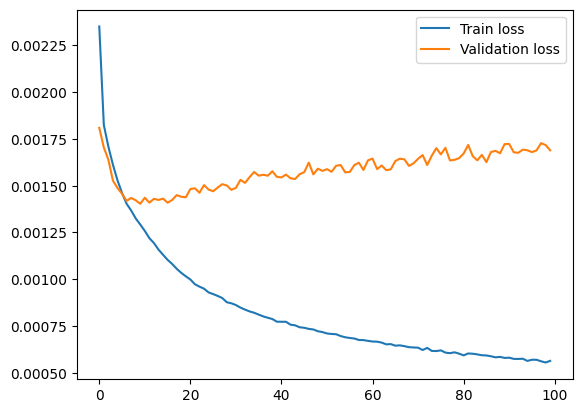

In [7]:
config_name = "classifier_big.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])
models_dir = Path(default_dirs["models_dir"]) / "classifiers" / "mlp" / "big"

# Hyperparameters
hyperparameters = config["hyperparameters"]
epochs = hyperparameters["epochs"]

epochs = 100

learning_rate = hyperparameters["learning_rate"]
seed = hyperparameters["seed"]

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]
dataset_splits = dataset_config["splits"]

batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
print(dataset_path)
# Create a dataset
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
accuracies_big = dict()

for train_size in [[0.001, 0.001, 0.998], [0.01, 0.01, 0.98], [0.02, 0.02, 0.96], [0.05, 0.05, 0.9], [0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.8, 0.1, 0.1], [0.9, 0.05, 0.05]]:
    torch.manual_seed(dataset_seed)

    dataset_splits = train_size

    # Split into train, validation and test sets
    dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
    dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=True)
    dataloader_test = torch.utils.data.DataLoader(dataset_test)

    print("Train sample:", len(dataset_train))
    print("Validation sample:", len(dataset_valid))
    print("Test sample:", len(dataset_test))

    torch.manual_seed(seed)

    # Init
    model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, valid_losses = trainer.train_mlp(model, epochs, learning_rate, criterion, optimizer, dataloader_train, dataloader_valid)

    plt.plot(train_losses, label="Train loss")
    plt.plot(valid_losses, label="Validation loss")
    plt.legend()
    plt.show()

    torch.save(model.state_dict(), models_dir / f"mlp_{train_size[0]}.pth")
    accuracy = trainer.get_accuracy(model, dataloader_test)
    accuracies_big[train_size[0]] = accuracy


In [3]:
config_name = "classifier_small.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])
models_dir = Path(default_dirs["models_dir"]) / "classifiers" / "mlp" / "small"

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]

batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

accuracies_small = dict()
for train_size in tqdm([[0.001, 0.001, 0.998], [0.01, 0.01, 0.98], [0.02, 0.02, 0.96], [0.05, 0.05, 0.9], [0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.8, 0.1, 0.1], [0.9, 0.05, 0.05]]):
    torch.manual_seed(dataset_seed)
    dataset_splits = train_size
    # Split into train, validation and test sets
    dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
    dataloader_test = torch.utils.data.DataLoader(dataset_test)

    model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
    model.to(device)
    model.load_state_dict(torch.load(models_dir / f"mlp_{train_size[0]}.pth"))
    model.eval()

    accuracy = trainer.get_accuracy(model, dataloader_test)
    accuracies_small[train_size[0]] = accuracy

Config loaded:
 {'name': 'classifier_small', 'dataset': {'name': 'zoo_small.csv', 'splits': [0.5, 0.25, 0.25], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 20, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 33, 'hidden_dims': [50, 20], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}


  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
config_name = "classifier_medium.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])
models_dir = Path(default_dirs["models_dir"]) / "classifiers" / "mlp" / "medium"

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]

batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

accuracies_medium = dict()
for train_size in tqdm([[0.001, 0.001, 0.998], [0.01, 0.01, 0.98], [0.02, 0.02, 0.96], [0.05, 0.05, 0.9], [0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.8, 0.1, 0.1], [0.9, 0.05, 0.05]]):
    torch.manual_seed(dataset_seed)
    dataset_splits = train_size
    # Split into train, validation and test sets
    dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
    dataloader_test = torch.utils.data.DataLoader(dataset_test)

    model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
    model.to(device)
    model.load_state_dict(torch.load(models_dir / f"mlp_{train_size[0]}.pth"))
    model.eval()

    accuracy = trainer.get_accuracy(model, dataloader_test)
    accuracies_medium[train_size[0]] = accuracy

Config loaded:
 {'name': 'classifier_medium', 'dataset': {'name': 'zoo_medium_medium.csv', 'splits': [0.7, 0.2, 0.1], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 50, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 151, 'hidden_dims': [400, 200], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}


  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
config_name = "classifier_big.yaml"
config = cfg.load_config(config_name)
print("Config loaded:\n", config)

default_dirs = cfg.get_default_dirs()
models_dir = Path(default_dirs["models_dir"])
datasets_dir = Path(default_dirs["datasets_dir"])
models_dir = Path(default_dirs["models_dir"]) / "classifiers" / "mlp" / "big"

# Model config
model_config = config["model"]
input_dim = model_config["input_dim"]
hidden_dims = model_config["hidden_dims"]
output_dim = model_config["output_dim"]
dropout = model_config.get("dropout", 0.0)
use_batch_norm = model_config.get("use_batch_norm", False)
output_activation = model_config.get("output_activation", "softmax")

# Load dataset
dataset_config = config["dataset"]
dataset_name = dataset_config["name"]

batch_size = dataset_config["batch_size"]
dataset_seed = dataset_config["seed"]

dataset_path = datasets_dir / dataset_name
dataset = ModelParamsDataset(dataset_path, 45, get_as_classes=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

accuracies_big = dict()
for train_size in tqdm([[0.001, 0.001, 0.998], [0.01, 0.01, 0.98], [0.02, 0.02, 0.96], [0.05, 0.05, 0.9], [0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [0.5, 0.3, 0.2], [0.7, 0.2, 0.1], [0.8, 0.1, 0.1], [0.9, 0.05, 0.05]]):
    torch.manual_seed(dataset_seed)
    dataset_splits = train_size
    # Split into train, validation and test sets
    dataset_train, dataset_valid, dataset_test = torch.utils.data.random_split(dataset, dataset_splits)
    dataloader_test = torch.utils.data.DataLoader(dataset_test)

    model = MLP(input_dim, hidden_dims, output_dim, dropout, use_batch_norm, output_activation)
    model.to(device)
    model.load_state_dict(torch.load(models_dir / f"mlp_{train_size[0]}.pth"))
    model.eval()

    accuracy = trainer.get_accuracy(model, dataloader_test)
    accuracies_big[train_size[0]] = accuracy

Config loaded:
 {'name': 'classifier_big', 'dataset': {'name': 'zoo_big.csv', 'splits': [0.7, 0.2, 0.1], 'batch_size': 128, 'seed': 42}, 'hyperparameters': {'epochs': 50, 'learning_rate': 0.005, 'optimizer': 'adam', 'criterion': 'bce', 'seed': 42}, 'model': {'input_dim': 261, 'hidden_dims': [400, 200], 'output_dim': 8, 'use_batch_norm': True, 'dropout': 0.2, 'output_activation': 'softmax'}}


  0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
plt.rcParams.update({"font.size": 12})

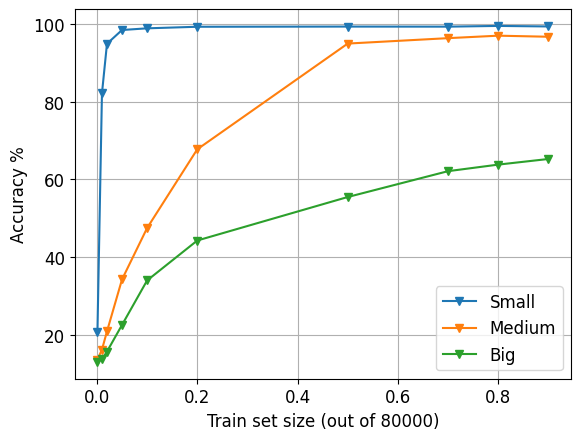

In [17]:
x = list(accuracies_small.keys())
y1 = list(accuracies_small.values())
y2 = list(accuracies_medium.values())
y3 = list(accuracies_big.values())

plt.plot(x, y1, label="Small", marker="v")
plt.plot(x, y2, label="Medium", marker="v")
plt.plot(x, y3, label="Big", marker = "v")

plt.xlabel("Train set size (out of 80000)")
plt.ylabel("Accuracy %")
plt.legend()
plt.grid()
plt.savefig("../../reports/mlp-accuracies.pdf")
plt.show()